In [2]:
import requests, re, nltk
from bs4 import BeautifulSoup as bs
from nltk.corpus import PlaintextCorpusReader

In [13]:
base_url = 'https://transcripts.fandom.com/wiki/'
aang_path = './LoA_scripts/'
korra_path = './LoK_scripts/'

In [58]:
epis_aang = '''The Boy in the Iceberg
The Avatar Returns
The Southern Air Temple
The Warriors of Kyoshi
The King of Omashu
Imprisoned
Winter_Solstice
The Waterbending Scroll
Jet
The Great Divide
The_Storm_(Avatar:_The_Last_Airbender)
The Blue Spirit
The Fortuneteller
Bato of the Water Tribe
The_Deserter_(Avatar:_The_Last_Airbender)
The Northern Air Temple
The Waterbending Master
The Siege of the North
The Avatar State
The Cave of Two Lovers
Return to Omashu
The Swamp
Avatar Day
The Blind Bandit
Zuko Alone
The Chase
Bitter Work
The Library
The Desert
The Serpent's Pass
The Drill
City of Walls and Secrets
The Tales of Ba Sing Se
Appa's Lost Days
Lake Laogai
The Earth King
The Guru
The Crossroads of Destiny
The Awakening
The Headband
The Painted Lady
Sokka's Master
The Beach
The Avatar and the Fire Lord
The Runaway
The Puppetmaster
Nightmares and Daydreams
The Day of Black Sun
The Western Air Temple
The Firebending Masters
The Boiling Rock
The Southern Raiders
The Ember Island Players
Sozin's Comet'''

In [20]:
epis_korra = '''Welcome to Republic City
A Leaf in the Wind
"The Revelation"
"The Voice in the Night"
"The Spirit of Competition"
"And the Winner Is..."
"The Aftermath"
"When Extremes Meet"
"Out of the Past"
"Turning the Tides"
"Skeletons in the Closet"
Endgame_(The_Legend_of_Korra)
"Rebel Spirit"
"The Southern Lights"
Civil_Wars
"Peacekeepers"
The_Sting_(The_Legend_of_Korra)
Beginnings
"The Guide"
"A New Spiritual Age"
"Night of a Thousand Stars"
"Harmonic Convergence"
"Darkness Falls"
"Light in the Dark" 
"A Breath of Fresh Air"
Rebirth_(The_Legend_of_Korra)
"The Earth Queen"
"In Harm's Way"
"The Metal Clan"
"Old Wounds"
"Original Airbenders"
"The Terror Within"
The_Stakeout_(The_Legend_of_Korra)
"Long Live the Queen"
"The Ultimatum"
"Enter the Void"
"Venom of the Red Lotus" 
"After All These Years"
"Korra Alone"
"The Coronation"
"The Calling"
"Enemy at The Gates"
"The Battle of Zaofu"
"Reunion"
"Remembrances"
"Beyond the Wilds"
"Operation Beifong"
"Kuvira's Gambit"
"Day of the Colossus"
"The Last Stand" '''

In [59]:
# Aang

split_list = epis_aang.split('\n')
aang_list = [re.sub(' ', '_', i) for i in split_list]

In [21]:
# Korra

epis_korra = re.sub('"','',epis_korra)
split_list = epis_korra.split('\n')
korra_list = [re.sub(' ', '_', i) for i in split_list]

In [7]:
print(korra_list)

['Welcome_to_Republic_City', 'A_Leaf_in_the_Wind', 'The_Revelation', 'The_Voice_in_the_Night', 'The_Spirit_of_Competition', 'And_the_Winner_Is...', 'The_Aftermath', 'When_Extremes_Meet', 'Out_of_the_Past', 'Turning_the_Tides', 'Skeletons_in_the_Closet', 'Endgame', 'Rebel_Spirit', 'The_Southern_Lights', 'Civil_Wars,_Part_1', 'Civil_Wars,_Part_2', 'Peacekeepers', 'The_Sting', 'Beginnings,_Part_1', 'Beginnings,_Part_2', 'The_Guide', 'A_New_Spiritual_Age', 'Night_of_a_Thousand_Stars', 'Harmonic_Convergence', 'Darkness_Falls', 'Light_in_the_Dark_', 'A_Breath_of_Fresh_Air', 'Rebirth', 'The_Earth_Queen', "In_Harm's_Way", 'The_Metal_Clan', 'Old_Wounds', 'Original_Airbenders', 'The_Terror_Within', 'The_Stakeout', 'Long_Live_the_Queen', 'The_Ultimatum', 'Enter_the_Void', 'Venom_of_the_Red_Lotus_', 'After_All_These_Years', 'Korra_Alone', 'The_Coronation', 'The_Calling', 'Enemy_at_The_Gates', 'The_Battle_of_Zaofu', 'Reunion', 'Remembrances', 'Beyond_the_Wilds', 'Operation_Beifong', "Kuvira's_Gambi

In [23]:
n = 0
for i in korra_list:
    n+=1
    epi = requests.get(base_url + i)
    parsed = bs(epi.text,'lxml')
    script = parsed.select('tbody')
    with open(korra_path+str(n).zfill(2)+'_'+i,'w') as script_file:
        for item in script:
            script_file.write(item.get_text())


In [24]:
tloa = PlaintextCorpusReader('./LoA_scripts/', '.*')

In [10]:
tloa.fileids()

['01_The_Boy_in_the_Iceberg',
 '02_The_Avatar_Returns',
 '03_The_Southern_Air_Temple',
 '04_The_Warriors_of_Kyoshi',
 '05_The_King_of_Omashu',
 '06_Imprisoned',
 '07_Winter_Solstice',
 '08_The_Waterbending_Scroll',
 '09_Jet',
 '10_The_Great_Divide',
 '11_The_Storm_(Avatar:_The_Last_Airbender)',
 '12_The_Blue_Spirit',
 '13_The_Fortuneteller',
 '14_Bato_of_the_Water_Tribe',
 '15_The_Deserter_(Avatar:_The_Last_Airbender)',
 '16_The_Northern_Air_Temple',
 '17_The_Waterbending_Master',
 '18_The_Siege_of_the_North',
 '19_The_Avatar_State',
 '20_The_Cave_of_Two_Lovers',
 '21_Return_to_Omashu',
 '22_The_Swamp',
 '23_Avatar_Day',
 '24_The_Blind_Bandit',
 '25_Zuko_Alone',
 '26_The_Chase',
 '27_Bitter_Work',
 '28_The_Library',
 '29_The_Desert',
 "30_The_Serpent's_Pass",
 '31_The_Drill',
 '32_City_of_Walls_and_Secrets',
 '33_The_Tales_of_Ba_Sing_Se',
 "34_Appa's_Lost_Days",
 '35_Lake_Laogai',
 '36_The_Earth_King',
 '37_The_Guru',
 '38_The_Crossroads_of_Destiny',
 '39_The_Awakening',
 '40_The_Headb

In [19]:
nltk.Text(meu_piru.words()).collocations()

Fire Nation; Fire Lord; camera pans; Long Feng; Water Tribe; scene
changes; Team Avatar; Earth Kingdom; Chit Sang; Joo Dee; Scene
changes; scene cuts; Frontal view; Jeong Jeong; overhead shot; turns
around; Blue Spirit; camera zooms; Wan Shi; Earth King


In [9]:
nltk.Text(tloa.words()).concordance('air')

Displaying 25 of 502 matches:
Katara Water . Earth . Fire . Air . My grandmother used to tell me stor
bes , Earth Kingdom , Fire Nation and Air Nomads . But that all changed when th
 the Avatar was never reborn into the Air Nomads and that the cycle is broken ,
e of water that holds the fish in the air and moving back and forth . The camer
omfort , the fish tumbles through the air and Katara follows its arc with her e
in half . Petrified , Sokka gasps for air , and it is only now that Katara turn
 [ With continuing disinterest and an air of skepticism .] Or it ' s just the c
 low , gruff noise suddenly fills the air , coming from within the crater of th
hoo ! [ The boy sneezes , creating an air blast that sends him soaring into the
blast that sends him soaring into the air . He lands on the ground , unharmed .
o the sky .] and flew ten feet in the air ! Aang [ He looks questioningly towar
higher than that . Katara [ Gasps for air in comprehension .] You ' re an airbe
d down and takes a

In [72]:
nltk.Text(tloa.words()).concordance('Water')

Displaying 25 of 767 matches:
Katara Water . Earth . Fire . Air . My grandmothe
 the Avatar kept balance between the Water Tribes , Earth Kingdom , Fire Nation
re towering icebergs drifting in the water as the shot rotates , moving over a 
t of the sea and of icebergs in blue water contrasted by the paleness of the sk
s into view , its motion through the water indicated by the wake left behind it
hile the girl simply stares into the water on the other side of the boat . The 
s behind her , looking down into the water over her shoulder , another fish qui
ara continues to move her hand , the water in front of Katara , just in front o
s to ripple . Suddenly , a bubble of water rises up from the ocean containing t
 her arms , suspending the bubble of water that holds the fish in the air and m
by the focus it takes to control the water . Katara [ Struggling with the water
water . Katara [ Struggling with the water that passes right in front of her .]
 following . He bursts the bubble of wat

In [73]:
nltk.Text(tloa.words()).concordance('fire')

Displaying 25 of 1261 matches:
Katara Water . Earth . Fire . Air . My grandmother used to tell 
n the Water Tribes , Earth Kingdom , Fire Nation and Air Nomads . But that all
mads . But that all changed when the Fire Nation attacked . Only the Avatar ma
 hundred years have passed , and the Fire Nation is nearing victory in the war
th Kingdom to help fight against the Fire Nation , leaving me and my brother t
the distant beam of light . Cut to a Fire Nation ship , where a boy in a Fire 
 Fire Nation ship , where a boy in a Fire Nation military uniform stands on th
He was probably trying to signal the Fire Navy ! Katara [ Pushes Sokka ' s spe
ah , I ' m sure he ' s a spy for the Fire Navy . You can tell by that evil loo
sed in the uniforms of a firebending Fire Nation soldier . Iroh is sitting on 
und in mid - air and directs another fire blast with his hand to the firebende
 left arm out as if he was sending a fire blast .] The breath becomes energy i
xtends past your limbs and becomes 

In [74]:
nltk.Text(tloa.words()).collocations()

Fire Nation; Fire Lord; camera pans; Long Feng; Water Tribe; scene
changes; Team Avatar; Earth Kingdom; Chit Sang; Joo Dee; Scene
changes; scene cuts; Frontal view; Jeong Jeong; overhead shot; turns
around; Blue Spirit; camera zooms; Wan Shi; Earth King


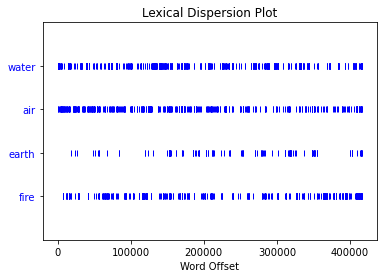

In [77]:
nltk.Text(tloa.words()).dispersion_plot(['water','air','earth','fire'])

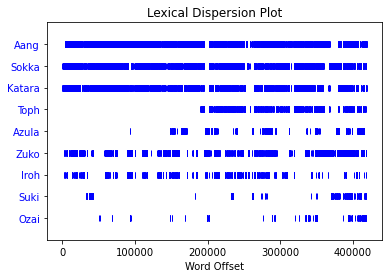

In [76]:
nltk.Text(tloa.words()).dispersion_plot(['Aang','Sokka','Katara','Toph','Azula','Zuko','Iroh','Suki','Ozai'])

In [82]:
tloa.sents("42_Sokka's_Master")

[['The', 'episode', 'begins', 'a', 'shot', 'of', 'a', 'meteor', 'shower', '.'], ['Camera', 'pans', 'down', 'with', 'Aang', ',', 'Katara', ',', 'Toph', 'and', 'Sokka', 'watching', 'the', 'meteor', 'shower', '.'], ...]

In [47]:
for sent in tloa.sents("Sokka's_Master"):
    print(sent)

['The', 'episode', 'begins', 'a', 'shot', 'of', 'a', 'meteor', 'shower', '.']
['Camera', 'pans', 'down', 'with', 'Aang', ',', 'Katara', ',', 'Toph', 'and', 'Sokka', 'watching', 'the', 'meteor', 'shower', '.']
['Katara']
['Wow', ',', 'this', 'is', 'amazing', 'to', 'watch', '.']
['Cut', 'closer', 'to', 'a', 'side', '-', 'view', 'of', 'the', 'group', '.']
['Sokka']
['Kind', 'of', 'makes', 'you', 'realize', 'how', 'insignificant', 'we', 'are', '.']
['Toph']
['[', 'Close', '-', 'up', '.']
['Causally', '.]']
['Eh', ',', 'you', "'", 've', 'seen', 'nothing', 'once', ',', 'you', "'", 've', 'seen', 'it', 'a', 'thousand', 'times', '.']
['Cut', 'further', 'away', 'showing', 'the', 'meteor', 'shower', 'above', 'them', '.']
['They', 'see', 'a', 'big', 'meteor', 'heading', 'for', 'the', 'ground', 'and', 'let', 'out', 'gasps', 'of', 'amazement', '.']
['Sokka']
['Oh', 'man', ',', '[', 'Close', '-', 'up', '.']
['Standing', '.]']
['you', "'", 've', 'never', 'not', 'seen', 'anything', 'like', 'this', '.']

['Side', '-', 'view', 'of', 'Sokka', 'who', ',', 'after', 'unsheathing', 'his', 'sword', ',', 'blocks', 'a', 'thrust', 'from', 'Piandao', '.']
['Side', '-', 'view', 'of', 'Aang', ',', 'Katara', ',', 'and', 'Toph', 'who', 'get', 'up', 'and', 'go', 'to', 'help', 'Sokka', '.']
['Cut', 'to', 'frontal', 'view', 'of', 'the', 'three', 'that', 'quickly', 'zooms', 'out', 'to', 'show', 'Sokka', 'who', 'raises', 'his', 'hand', 'to', 'stop', 'them', '.']
['Sokka']
['No', ',', 'this', 'is', 'my', 'fight', ',', 'alone', '.']
['Cut', 'to', 'a', 'close', '-', 'up', 'of', 'Piandao', 'before', 'cutting', 'to', 'Iroh', "'", 's', 'cell', '.']
['Warden', 'Poon', 'enters', ',', 'carrying', 'a', 'tray', 'of', 'food', '.']
['The', 'camera', 'pans', 'right', 'to', 'a', 'close', '-', 'up', 'of', 'Iroh', '.']
['Warden', 'Poon']
['You', 'used', 'to', 'be', 'the', 'pride', 'of', 'the', 'Fire', 'Nation', '.']
['Our', 'top', 'general', ',', 'the', 'Dragon', 'of', 'the', 'West', '.']
['Now', ',', 'look', 'at', 'you',

In [40]:
for fileid in tloa.fileids():
    print('{0} --- tokens: {1}: --- types: {2}'.format(fileid,
                            len(tloa.words(fileid)),len(set(tloa.words(fileid)))))

01_The_Boy_in_the_Iceberg --- tokens: 9379: --- types: 1780
02_The_Avatar_Returns --- tokens: 8570: --- types: 1637
03_The_Southern_Air_Temple --- tokens: 12315: --- types: 1788
04_The_Warriors_of_Kyoshi --- tokens: 12368: --- types: 1935
05_The_King_of_Omashu --- tokens: 8448: --- types: 1575
06_Imprisoned --- tokens: 6486: --- types: 1489
07_Winter_Solstice --- tokens: 11537: --- types: 1988
08_The_Waterbending_Scroll --- tokens: 5887: --- types: 1230
09_Jet --- tokens: 7101: --- types: 1373
10_The_Great_Divide --- tokens: 5275: --- types: 1127
11_The_Storm_(Avatar:_The_Last_Airbender) --- tokens: 7311: --- types: 1412
12_The_Blue_Spirit --- tokens: 5644: --- types: 1315
13_The_Fortuneteller --- tokens: 9264: --- types: 1735
14_Bato_of_the_Water_Tribe --- tokens: 8056: --- types: 1439
15_The_Deserter_(Avatar:_The_Last_Airbender) --- tokens: 5257: --- types: 1177
16_The_Northern_Air_Temple --- tokens: 6483: --- types: 1286
17_The_Waterbending_Master --- tokens: 5483: --- types: 1224
1

In [74]:
new_2.count('water')

3

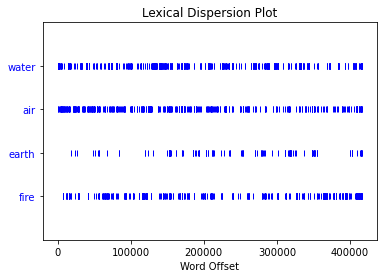

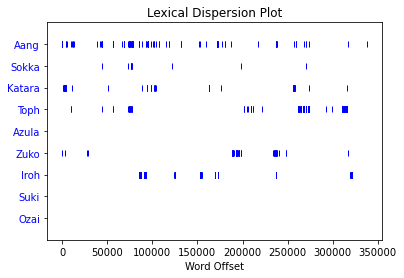

In [28]:
nltk.Text(tlok.words()).dispersion_plot(['Aang','Sokka','Katara','Toph','Azula','Zuko','Iroh','Suki','Ozai'])